<a href="https://colab.research.google.com/github/Aakushah/MultipleLinearRegression/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Step 1: Generate and Save Dataset

In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate 200 random advertising budgets
TV = np.random.uniform(10, 300, 10)  # TV advertising budget
Radio = np.random.uniform(5, 100, 10)  # Radio advertising budget
Newspaper = np.random.uniform(2, 50, 10)  # Newspaper advertising budget
print(TV)



# Generate Sales with some noise
Sales = 4.5 * TV + 3.2 * Radio + 2.1 * Newspaper + np.random.normal(0, 50, 10)

# Create DataFrame
df = pd.DataFrame({'TV': TV, 'Radio': Radio, 'Newspaper': Newspaper, 'Sales': Sales})

# Save as CSV
df.to_csv('data_linear_regression.csv', index=False)

df.head()


[118.61663447 285.70714886 222.27824313 183.61096042  55.24540573
  55.2384109   26.84424753 261.19108227 184.32335341 215.34104756]


,TV,Radio,Newspaper,Sales
0,118.616634,6.955527,31.368939,564.357634
1,285.707149,97.141436,8.695705,1633.580647
2,222.278243,84.082051,16.022943,1272.930903
3,183.610960,25.172216,19.585368,933.344998
4,55.245406,22.273372,23.891359,339.965640


📌 Step 2: Load and Normalize Data

In [ ]:
# Load dataset
df = pd.read_csv('data_linear_regression.csv')

# Extract features (TV, Radio, Newspaper) and target (Sales)
features = df[['TV', 'Radio', 'Newspaper']].values  # (200,3)
targets = df['Sales'].values.reshape(-1,1)  # (200,1)

# Normalization function
def normalize(features):
    for feature in features.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)
        feature -= fmean
        feature /= frange
    return features


# Normalize features
features = normalize(features)


# Add bias term (column of ones)
features = np.c_[np.ones(features.shape[0]), features]  # (200,4)

# Initialize weights
weights = np.zeros((features.shape[1], 1))  # (4,1)




📌 Step 3: Define Model Functions

In [ ]:
# Prediction function
def predict(features, weights):
    return np.dot(features, weights)  # (200,1)

# Cost function (Mean Squared Error)
def cost_function(features, targets, weights):
    N = len(targets)
    predictions = predict(features, weights)
    sq_error = (predictions - targets) ** 2
    return 1.0 / (2 * N) * sq_error.sum()



# Gradient Descent function
def update_weights(features, targets, weights, lr):
    N = len(targets)
    predictions = predict(features, weights)
    error = predictions - targets           #(10,1)
    # print("features: ",features)            #(10,4)
    # print("error: ",error)                  #(10,1)

    gradient = np.dot(features.T, error) / N   #(4,1)

    weights -= lr * gradient
    return weights


📌 Step 4: Train the Model

In [ ]:
# Training loop
epochs = 1000
learning_rate = 0.1

for epoch in range(epochs):
    weights = update_weights(features, targets, weights, learning_rate)

    if epoch % 100 == 0:
        loss = cost_function(features, targets, weights)
        print(f"Epoch {epoch}: Loss = {loss:.4f}")


Epoch 0: Loss = 418063.6069
Epoch 100: Loss = 6714.6902
Epoch 200: Loss = 2155.9671
Epoch 300: Loss = 1132.5541
Epoch 400: Loss = 801.7082
Epoch 500: Loss = 680.5121
Epoch 600: Loss = 630.3219
Epoch 700: Loss = 607.0872
Epoch 800: Loss = 595.4072
Epoch 900: Loss = 589.2240


📌 Step 5: Make Predictions



In [ ]:

y_pred = predict(features, weights)

print("\nFirst 5 Predictions vs Actual:")
print(np.column_stack((y_pred[:5], targets[:5])))


def r2_score(y_true, y_pred):
    """
    Calculate the R² score (Coefficient of Determination).
    """
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true)**2)  # Total sum of squares
    ss_residual = np.sum((y_true - y_pred)**2)   # Residual sum of squares

    r2 = 1 - (ss_residual / ss_total)
    return r2

r2 = r2_score(y_pred, targets)
print(f"R² Score: {r2:.4f}")


First 5 Predictions vs Actual:
[[ 601.775707    564.35763428]
 [1606.87709091 1633.58064699]
 [1317.42604832 1272.93090294]
 [ 901.5027991   933.34499784]
 [ 377.16880399  339.96563961]]
R² Score: 0.9939


📌 Step 6: Visualize Regression Results

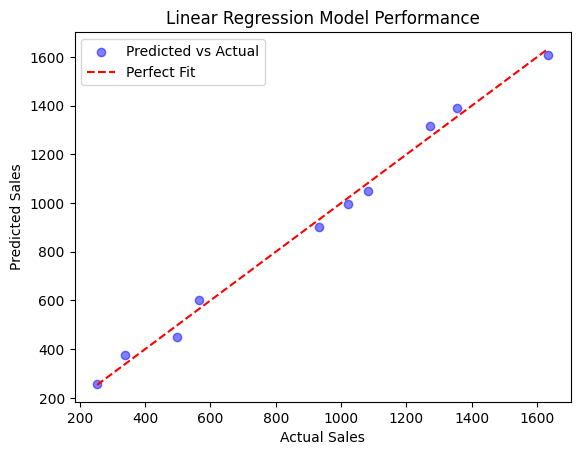

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted
plt.scatter(targets, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")

# Perfect Prediction Line
plt.plot([min(targets), max(targets)], [min(targets), max(targets)], color='red', linestyle='dashed', label="Perfect Fit")

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression Model Performance")
plt.legend()
plt.show()
